In [10]:
import torch

print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

Torch version: 2.0.1+cpu
Is CUDA enabled? False


600
100
5
1
0
Epoch 1/100 - Loss: 2.0437371730804443
1
Epoch 2/100 - Loss: 1.7672420740127563
2
Epoch 3/100 - Loss: 1.5998408794403076
3
Epoch 4/100 - Loss: 1.3877009153366089
4
Epoch 5/100 - Loss: 1.3199362754821777
5
Epoch 6/100 - Loss: 1.124476432800293
6
Epoch 7/100 - Loss: 1.0306512117385864
7
Epoch 8/100 - Loss: 0.9193214178085327
8
Epoch 9/100 - Loss: 0.8644171357154846
9
Epoch 10/100 - Loss: 0.801303505897522
10
Epoch 11/100 - Loss: 0.8011554479598999
11
Epoch 12/100 - Loss: 0.7596120238304138
12
Epoch 13/100 - Loss: 0.7370831966400146
13
Epoch 14/100 - Loss: 0.7456384897232056
14
Epoch 15/100 - Loss: 0.5859179496765137
15
Epoch 16/100 - Loss: 0.5445570349693298
16
Epoch 17/100 - Loss: 0.5685524940490723
17
Epoch 18/100 - Loss: 0.7087708115577698
18
Epoch 19/100 - Loss: 0.6423956751823425
19
Epoch 20/100 - Loss: 0.5456532835960388
20
Epoch 21/100 - Loss: 0.5224024653434753
21
Epoch 22/100 - Loss: 0.5525801181793213
22
Epoch 23/100 - Loss: 0.4637633264064789
23
Epoch 24/100 - Lo

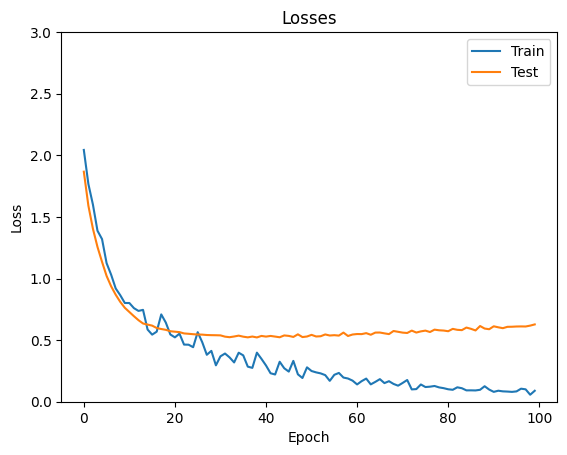

In [11]:
import time
from torchvision import transforms, datasets
import torch
from torch.utils.data import Subset
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,))])

#how to get train and test data
train_data = datasets.FashionMNIST('path', download=True, train=True, transform=transform)
test_data = datasets.FashionMNIST('path', download=True, train=False, transform=transform)


train_indices = list(range(len(train_data)))
random.shuffle(train_indices)
train_indices_10_percent = train_indices[:len(train_indices)//100]

test_indices = list(range(len(test_data)))
random.shuffle(test_indices)
test_indices_10_percent = test_indices[:len(test_indices)//100]

train_data_10_percent = Subset(train_data, train_indices_10_percent)
test_data_10_percent = Subset(test_data, test_indices_10_percent)


print(len(train_data_10_percent))
print(len(test_data_10_percent))
#Define a dataloader to load data
train_loader = torch.utils.data.DataLoader(train_data_10_percent, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data_10_percent, batch_size=128, shuffle=True)

print(len(train_loader))
print(len(test_loader))    
def train(model, criterion, optimizer, data_loader, test_loader, epochs):
    strart_timestamp = time.time()
    training_loss = []
    test_loss = []
    for epoch in range(epochs):
        print(epoch)
        for images, labels in data_loader:
            # Flatten images
            images = images.view(images.shape[0], -1)
            # Zero out the gradients
            optimizer.zero_grad()
            # Forward pass, get our logits
            logits = model(images)
            # Calculate the loss with the logits and the labels
            loss = criterion(logits, labels)
            # Backward pass
            loss.backward()
            # Update the weights
            optimizer.step()

        training_loss.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item()}")
        with torch.no_grad():
            for images, labels in test_loader:
                # Flatten images
                images = images.view(images.shape[0], -1)
                # Forward pass, get our logits
                logits = model(images)
                # Calculate the loss with the logits and the labels
                loss = criterion(logits, labels)
            test_loss.append(loss.item())

    print(f"\nTraining Time (in minutes) = {(time.time()-strart_timestamp)/60:.2f}")
    print(training_loss, test_loss)
    return training_loss, test_loss

def plot_loss(losses, title):
    train, test = losses
    plt.plot(train)
    plt.plot(test)
    plt.legend(['Train', 'Test'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0, 3)
    plt.show()

# Define the network architecture
model = nn.Sequential(nn.Linear(784, 128),
                      nn.LeakyReLU(),
                      nn.Linear(128, 64),
                      nn.LeakyReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

def init_xavier(m):
    if isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight)
        init.constant_(m.bias, 0)

model.apply(init_xavier)

# Define the loss
criterion = nn.NLLLoss();

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0002)
epochs = 100



losses = train(model, criterion, optimizer, train_loader, test_loader, epochs=epochs)
plot_loss(losses, 'Losses')

